In [1]:
import sys
import pandas as pd
Yourdir = '/Users/jacob/Documents/GitHub/'
sys.path.append(Yourdir)
from PyWPEM import WPEM


██╗    ██╗██████╗ ███████╗███╗   ███╗
██║    ██║██╔══██╗██╔════╝████╗ ████║
██║ █╗ ██║██████╔╝█████╗  ██╔████╔██║
██║███╗██║██╔═══╝ ██╔══╝  ██║╚██╔╝██║
╚███╔███╔╝██║     ███████╗██║ ╚═╝ ██║
 ╚══╝╚══╝ ╚═╝     ╚══════╝╚═╝     ╚═╝                                                  

A Diffraction Refinement Software : WPEM
Bin Cao, Advanced Materials Thrust, Hong Kong University of Science and Technology (Guangzhou)
URL : https://github.com/Bin-Cao/WPEM
Executed on : 2023-10-11 19:40:21  | Have a great day.


# background intensity

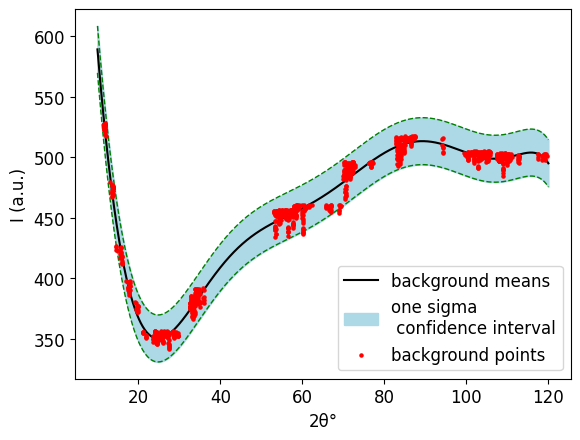

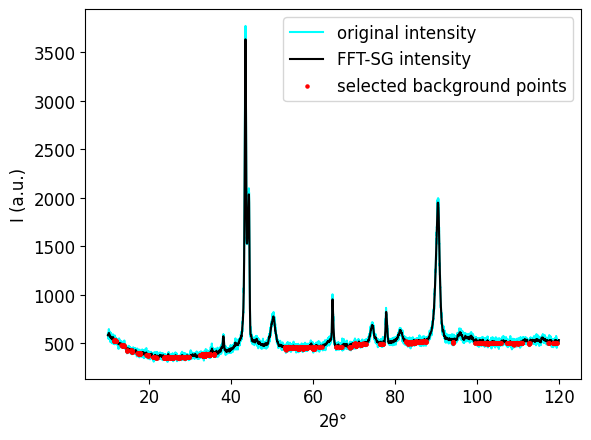

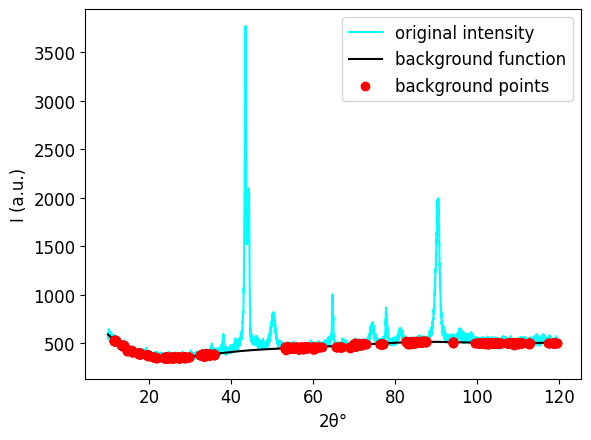

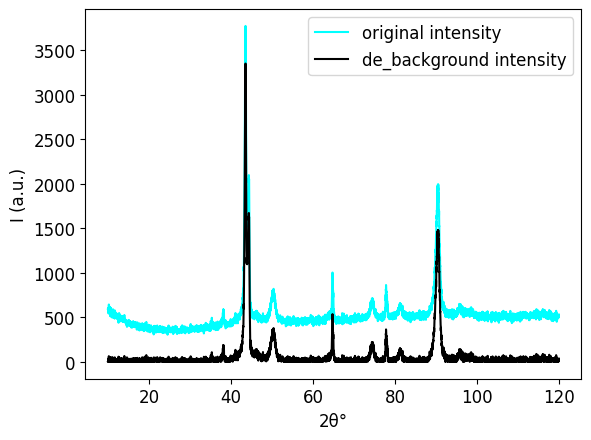

19.395310156877105

<Figure size 640x480 with 0 Axes>

In [2]:
intensity_csv = pd.read_csv(r'intensity.csv',header=None )
var = WPEM.BackgroundFit(intensity_csv,lowAngleRange=20,poly_n=8,bac_split=8,bac_num=1000)
var

# cal HKL

In [5]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='FCCAl.cif',two_theta_range=(10, 120),show_unitcell=True,cal_extinction=False)

the space group of input crystal is : F m -3 m
cif file parse completed
atom locations claculated by parsed cif file
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 0 extinction peaks
Diffraction condition judgment end !


interactive(children=(IntSlider(value=30, description='elevation', max=90, min=-90), IntSlider(value=60, descr…

In [6]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='BCCAl.cif',two_theta_range=(10, 120),show_unitcell=True,cal_extinction=False)

the space group of input crystal is : I m -3 m
cif file parse completed
cif file parse failed with error
Please replace another cif file, or enter manually the essential params!
Please input asymmetric_atomic_coordinates, contains space group code (i.e., 72,['Cu2+',0,0,0,],['O-2',0.5,1,1,],.....):229,['Al',0,0,0,]
atom locations claculated by parsed cif file
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 0 extinction peaks
Diffraction condition judgment end !


interactive(children=(IntSlider(value=30, description='elevation', max=90, min=-90), IntSlider(value=60, descr…

In [3]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='Co.cif',two_theta_range=(10, 120),show_unitcell=True,cal_extinction=False)

the space group of input crystal is : F m -3 m
cif file parse completed
atom locations claculated by parsed cif file
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 0 extinction peaks
Diffraction condition judgment end !


interactive(children=(IntSlider(value=30, description='elevation', max=90, min=-90), IntSlider(value=60, descr…

In [14]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='Ni.cif',two_theta_range=(10, 120),show_unitcell=True,cal_extinction=False)

the space group of input crystal is : F m -3 m
cif file parse completed
atom locations claculated by parsed cif file
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 0 extinction peaks
Diffraction condition judgment end !


interactive(children=(IntSlider(value=30, description='elevation', max=90, min=-90), IntSlider(value=60, descr…

# WPEM fitting

Started at Wed Oct 11 20:21:31 2023 

Initialization
--------------------------------------------------------------------------------
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM


The input crystal system is: Cubic  |  The initial lattice constants : 3.55 3.55 3.55 90 90 90
The input crystal system is: Cubic  |  The initial lattice constants : 3.61019 3.61019 3.61019 90 90 90
The input crystal system is: Cubic  |  The initial lattice constants : 2.87 2.87 2.87 90 90 90
—————————— Initilize the parameters by WPEM ——————————
Parameter initialization has been completed 

WPEM 1-th iteration
[array([ 3.55006,  3.55006,  3.55006, 90.     , 90.     , 90.     ]), array([ 3.61015,  3.61015,  3.61015, 90.     , 90.     , 90.     ]), array([ 2.8701,  2.8701,  2.8701, 90.   

After update the background :   Rp = 4.082 | Rwp = 7.834 | Rsquare = 7.655


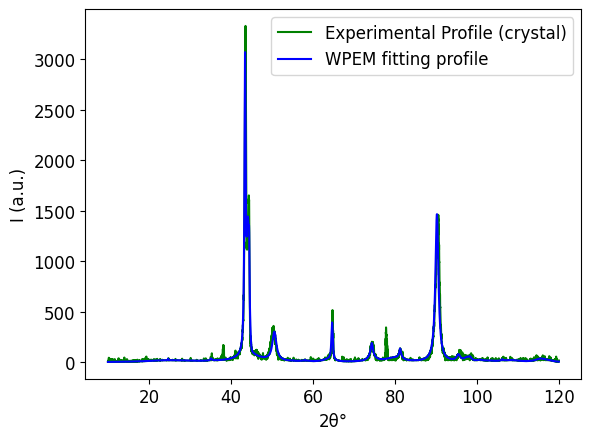

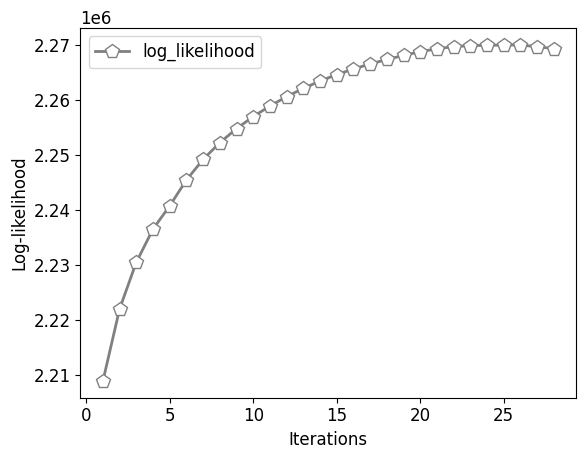

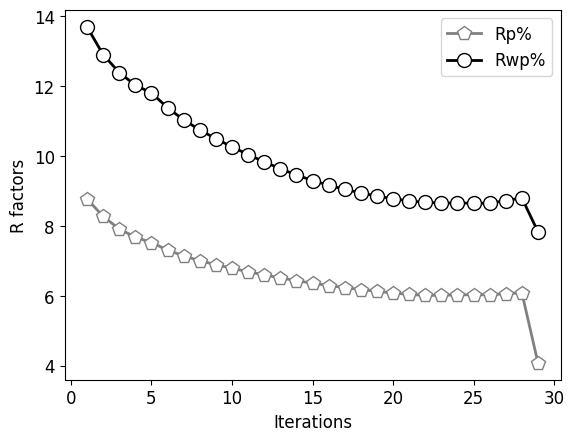

volume fraction without structure factor estimate in % : [14.319612757513065, 74.8227775598482, 10.857609682638723] 
 Saved at the result documents
28-th iterations, reach the limit of lock_num.
 Rp: 4.082
Rwp: 7.834 


WPEM program running time :  0 hours 1 minute  22 second  


'0 hours 1 minute  22 second  '

<Figure size 640x480 with 0 Axes>

In [14]:
# The wavelength is set according to the actual light source
wavelength = [1.540593, 1.544414]

# Enter the file name to read on the right side of the equal sign. 
# Please remember to quote, string.

# The file name of non-background data (2theta-intensity data)
no_bac_intensity_file = "no_bac_intensity.csv" 
# The file name of raw/original data (2theta-intensity data)
original_file = "intensity.csv"  
# The file name of background data (2theta-intensity data)
bacground_file = "bac.csv"  


# Input the initial lattice constants {a, b, c, α, β, γ}, whose values need to be assumed at initialization.

Lattice_constants = [[  3.55,   3.55,  3.55, 90, 90, 90],[ 3.61019,  3.61019, 3.61019, 90, 90, 90],
                    [  2.87,   2.87,  2.87, 90, 90, 90],
                   ]

# Execute the model
WPEM.XRDfit(
    wavelength, var, Lattice_constants,no_bac_intensity_file, original_file, bacground_file, 
    InitializationEpoch=0,subset_number=5,low_bound=35,up_bound=100,bta = 0.95,iter_max = 50, asy_C = 0,Ave_Waves=True
    )

Name assigned successfully


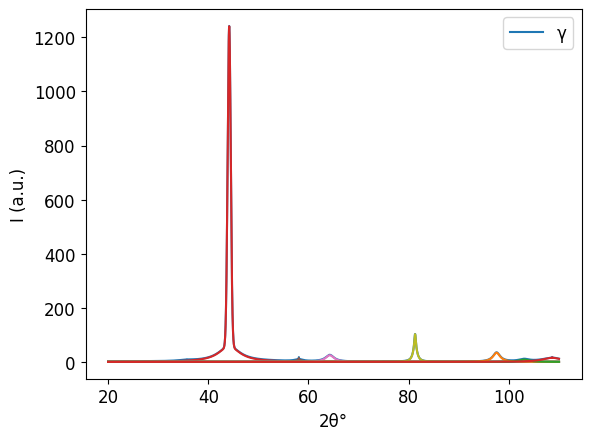

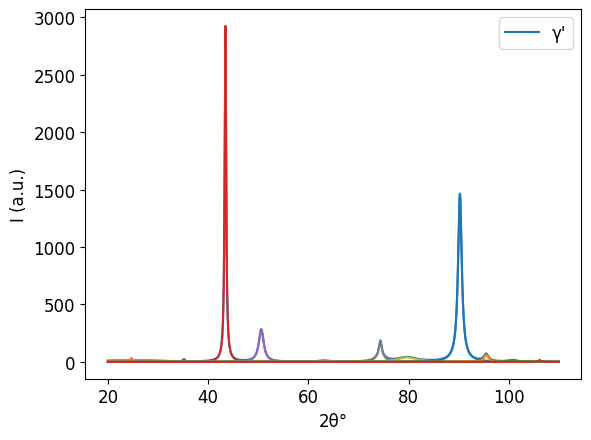

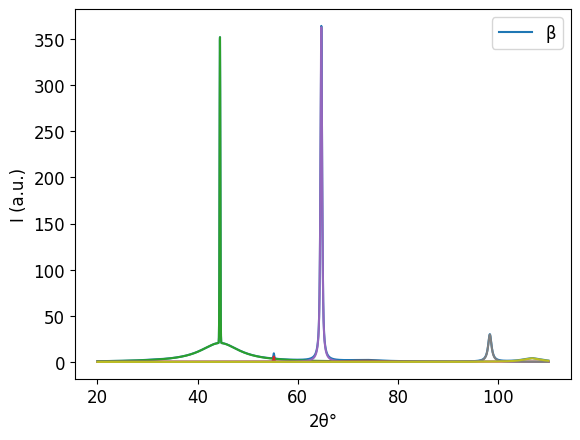

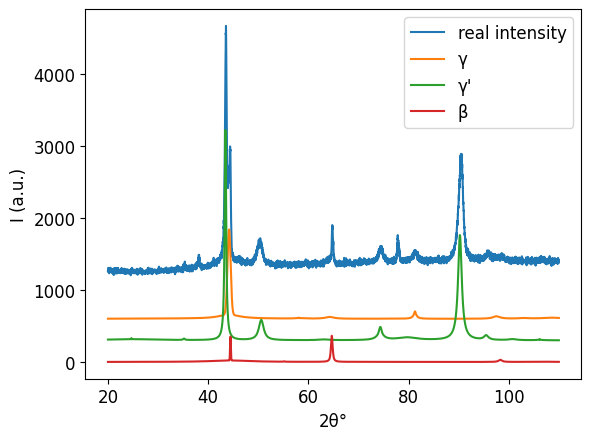

volume fraction estimate in % (calculated by integral area): [24.079323291703098, 67.69369486851772, 8.226981839779182] 
 Saved at the DecomposedComponents document


In [15]:
name = ['γ','γ\'','\u03B2',]
wavelength = [1.540593*2/3+ 1.544414*1/3]
WPEM.Plot_Components(lowboundary=20,lifting=[600,300,0,900,], upboundary=110,name = name, wavelength = wavelength, phase=3)